# Implementación Incremental

## Nombre:

- **Ibarra Calderón Luis Alberto**  
- **Soliz Ortega David Franz**

Se cargan los módulos para usar el entorno `SnakeEnv`, manejar datos numéricos, operaciones aleatorias y visualización con Matplotlib.

In [9]:
from snake_v1 import SnakeEnv
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt


# Inicialización del espacio de estados y tablas Q y N
Se discretizan los estados posibles y se inicializan la tabla de valores Q y la tabla de conteos N por acción.

In [10]:
all_states = list(itertools.product([-1, 0, 1], repeat=6))
Q = {state: [0.0] * 4 for state in all_states}
N = {state: [0] * 4 for state in all_states}

In [11]:
# Parámetros
turnos = 5000
epsilons = [0.5]
recompensas_medias = np.zeros((len(epsilons), turnos))
acciones_exploradas = np.zeros((len(epsilons), turnos))

for i, epsilon in enumerate(epsilons):
    for episodio in range(turnos):
        env = SnakeEnv()
        state = env.reset()
        done = False
        total_reward = 0
        exploraciones = 0

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = random.choice(env.actions)
                exploraciones += 1
            else:
                action = np.argmax(Q.get(state, [0]*4))

            next_state, reward, done = env.step(action)

            if state not in Q:
                Q[state] = [0.0] * 4
                N[state] = [0] * 4

            N[state][action] += 1
            alpha = 1 / N[state][action]
            Q[state][action] += alpha * (reward - Q[state][action])

            state = next_state
            total_reward += reward

        recompensas_medias[i][episodio] = total_reward
        acciones_exploradas[i][episodio] = exploraciones

        if (episodio + 1) % 10 == 0:
            promedio = np.mean(recompensas_medias[i][max(0, episodio-9):episodio+1])
            print(f"Episodio {episodio + 1} (ε = {epsilon}), Promedio últimos 10: {promedio:.2f}")


Episodio 10 (ε = 0.5), Promedio últimos 10: -11.32
Episodio 20 (ε = 0.5), Promedio últimos 10: -11.58
Episodio 30 (ε = 0.5), Promedio últimos 10: -10.40
Episodio 40 (ε = 0.5), Promedio últimos 10: -13.76
Episodio 50 (ε = 0.5), Promedio últimos 10: -11.16
Episodio 60 (ε = 0.5), Promedio últimos 10: -12.41
Episodio 70 (ε = 0.5), Promedio últimos 10: -12.00
Episodio 80 (ε = 0.5), Promedio últimos 10: -11.96
Episodio 90 (ε = 0.5), Promedio últimos 10: -12.81
Episodio 100 (ε = 0.5), Promedio últimos 10: -13.03
Episodio 110 (ε = 0.5), Promedio últimos 10: -12.65
Episodio 120 (ε = 0.5), Promedio últimos 10: -12.03
Episodio 130 (ε = 0.5), Promedio últimos 10: -10.84
Episodio 140 (ε = 0.5), Promedio últimos 10: -10.33
Episodio 150 (ε = 0.5), Promedio últimos 10: -12.56
Episodio 160 (ε = 0.5), Promedio últimos 10: -11.59
Episodio 170 (ε = 0.5), Promedio últimos 10: -8.07
Episodio 180 (ε = 0.5), Promedio últimos 10: -11.67
Episodio 190 (ε = 0.5), Promedio últimos 10: -10.32
Episodio 200 (ε = 0.5)

# Visualización del desempeño
Se grafican las recompensas por episodio y el porcentaje de exploración por el epsilon.

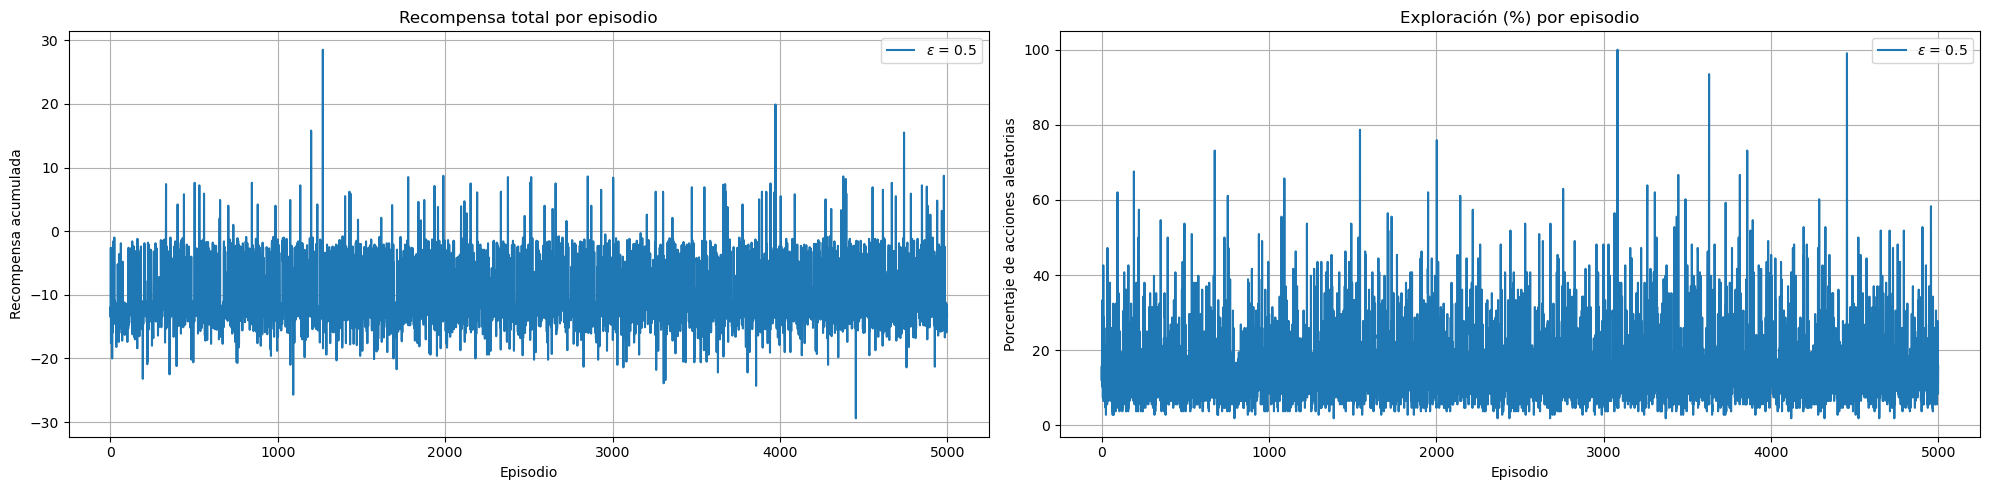

In [12]:
plt.figure(figsize=(20, 5))

# Recompensas por episodio
plt.subplot(1, 2, 1)
for i, epsilon in enumerate(epsilons):
    plt.plot(recompensas_medias[i], label=f"$\\epsilon$ = {epsilon}")
plt.title("Recompensa total por episodio")
plt.xlabel("Episodio")
plt.ylabel("Recompensa acumulada")
plt.grid(True)
plt.legend()

# Exploración por episodio
plt.subplot(1, 2, 2)
for i, epsilon in enumerate(epsilons):
    porcentaje_exploracion = 100 * acciones_exploradas[i] / np.maximum(acciones_exploradas[i].max(), 1)
    plt.plot(porcentaje_exploracion, label=f"$\\epsilon$ = {epsilon}")
plt.title("Exploración (%) por episodio")
plt.xlabel("Episodio")
plt.ylabel("Porcentaje de acciones aleatorias")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
# Demostración visual con un ε específico
import pygame

epsilon_demo = 0.5  # Cambiar manualmente para ver otra política
Q_demo = Q  # Reutiliza la Q aprendida

env = SnakeEnv()
state = env.reset()
done = False

print(f"Demostración visual con política ε = {epsilon_demo}")

while not done:
    pygame.event.pump()
    action = int(np.argmax(Q_demo.get(state, [0]*4)))
    state, reward, done = env.step(action)
    env.render()
    pygame.time.delay(100)

pygame.quit()
print("Puntaje final alcanzado:", env.score)


Demostración visual con política ε = 0.5
Puntaje final alcanzado: 0
